
# Project: Investigate a Dataset - [Appointment_data]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

# Introduction

Dataset Description 

This data entails 100k medical appointments infromation of 100 thousand patients in Brazil.
some characteristics about the patient in the dataframe includes :the scheduled date, appointment date, the ailment, if they received sms, if they showed up for the appointment.

# Question(s) for Analysis

We are to determine important factors  we can use to predict if a patient will show up for their scheduled appointment or not

The questions to ask are:

1. what age range of patients are the highest?
2. What age range of patients shows up for their appointment the most?
3. What neighborhood hospital has the highest registration?
4. what percentage of patients benefited from the scholarship ?
5. what are the days interval between scheduled and appointment day?
6. what day Interval shows up the most for appointment?

We import statements for all of the packages to be used in the project

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
% matplotlib inline

In [2]:
# Upgrade pandas to use dataframe.explode() function. 
!pip install --upgrade pandas==0.25.0

Requirement already up-to-date: pandas==0.25.0 in /opt/conda/lib/python3.6/site-packages (0.25.0)


We load in the data which is 'Appointment_data' in csv format and check some characteristics

In [3]:
df = pd.read_csv('Appointment_data.csv')
df.info()
df.shape


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


(110527, 14)

We check for null values

In [4]:
df.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

We check for duplicates value

In [5]:
df.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
110522    False
110523    False
110524    False
110525    False
110526    False
Length: 110527, dtype: bool

We check for value types of each column

In [6]:
df.dtypes

PatientId         float64
AppointmentID       int64
Gender             object
ScheduledDay       object
AppointmentDay     object
Age                 int64
Neighbourhood      object
Scholarship         int64
Hipertension        int64
Diabetes            int64
Alcoholism          int64
Handcap             int64
SMS_received        int64
No-show            object
dtype: object

From the investigation done above, it can be deduced that;
1. the dataframe has 110527 rows and 14 columns
2. there are no null values and there are no duplicated values
3. most of the columns are entered in the wrong datatypes such as scheduled day, appointment day in which we will rectify in data cleaning

### Data Cleaning

Since the data has no misssing values and No duplicated values, the major thing to correct are the data types.

The data types are not inline with most column values, thereby data types of some columns will be corrected

We will convert AppointmentDay and Scheduled day data type from object to datetime

In [7]:
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay'])
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay'])

the column 'SMS received' which state weather a patient received SMS as reminder for appointment is best converted from integer to string, since its a yes or no question.

In [8]:
df['SMS_received'] = df['SMS_received'].map(
                   {'Yes':False ,'No':True})

In the AppointmentDay and Schedule day, it can be seen that Date and Time are joined together in the values input. Thereby we separate the values into Date and Time and create separate columns for them

In [9]:
#separating date from time by creating new columns Appointment Day and Appointment Time

pd.DataFrame({'AppointmentDay':pd.date_range('2016-04-29 00:00',periods=6)})
print("DataFrame is:\n", df)
df['Appointment_date'] = pd.to_datetime(df['AppointmentDay']).dt.date
df['Appointment_time'] = pd.to_datetime(df['AppointmentDay']).dt.time

DataFrame is:
            PatientId  AppointmentID Gender              ScheduledDay  \
0       2.987250e+13        5642903      F 2016-04-29 18:38:08+00:00   
1       5.589978e+14        5642503      M 2016-04-29 16:08:27+00:00   
2       4.262962e+12        5642549      F 2016-04-29 16:19:04+00:00   
3       8.679512e+11        5642828      F 2016-04-29 17:29:31+00:00   
4       8.841186e+12        5642494      F 2016-04-29 16:07:23+00:00   
...              ...            ...    ...                       ...   
110522  2.572134e+12        5651768      F 2016-05-03 09:15:35+00:00   
110523  3.596266e+12        5650093      F 2016-05-03 07:27:33+00:00   
110524  1.557663e+13        5630692      F 2016-04-27 16:03:52+00:00   
110525  9.213493e+13        5630323      F 2016-04-27 15:09:23+00:00   
110526  3.775115e+14        5629448      F 2016-04-27 13:30:56+00:00   

                  AppointmentDay  Age      Neighbourhood  Scholarship  \
0      2016-04-29 00:00:00+00:00   62    JARDIM

In [10]:
#separating date from time by creating new columns Scheduled Date and Scheduled Time

pd.DataFrame({'ScheduledDay':pd.date_range('2016-04-29 18:38',periods=6)})
print("DataFrame is:\n", df)
df['Scheduled_date'] = pd.to_datetime(df['ScheduledDay']).dt.date
df['Scheduled_time'] = pd.to_datetime(df['ScheduledDay']).dt.time

DataFrame is:
            PatientId  AppointmentID Gender              ScheduledDay  \
0       2.987250e+13        5642903      F 2016-04-29 18:38:08+00:00   
1       5.589978e+14        5642503      M 2016-04-29 16:08:27+00:00   
2       4.262962e+12        5642549      F 2016-04-29 16:19:04+00:00   
3       8.679512e+11        5642828      F 2016-04-29 17:29:31+00:00   
4       8.841186e+12        5642494      F 2016-04-29 16:07:23+00:00   
...              ...            ...    ...                       ...   
110522  2.572134e+12        5651768      F 2016-05-03 09:15:35+00:00   
110523  3.596266e+12        5650093      F 2016-05-03 07:27:33+00:00   
110524  1.557663e+13        5630692      F 2016-04-27 16:03:52+00:00   
110525  9.213493e+13        5630323      F 2016-04-27 15:09:23+00:00   
110526  3.775115e+14        5629448      F 2016-04-27 13:30:56+00:00   

                  AppointmentDay  Age      Neighbourhood  Scholarship  \
0      2016-04-29 00:00:00+00:00   62    JARDIM

In [11]:
#converting the new columns created to the appropriate data type

df['Scheduled_date'] = pd.to_datetime(df['Scheduled_date'])
df['Appointment_date'] = pd.to_datetime(df['Appointment_date'])

In [12]:
#to confirm if the data types are in line

df.dtypes

PatientId                       float64
AppointmentID                     int64
Gender                           object
ScheduledDay        datetime64[ns, UTC]
AppointmentDay      datetime64[ns, UTC]
Age                               int64
Neighbourhood                    object
Scholarship                       int64
Hipertension                      int64
Diabetes                          int64
Alcoholism                        int64
Handcap                           int64
SMS_received                     object
No-show                          object
Appointment_date         datetime64[ns]
Appointment_time                 object
Scheduled_date           datetime64[ns]
Scheduled_time                   object
dtype: object

For our analysis, its important to find out the days interval between a patients scheduled date and appointment day. 
To derive this, we subtract the scheduled date from the appointment date which we name the column 'Days_interval'.

We do this to later check if the days interval between the scheduled and appointment day is a factor that determine if a  patients will show up for appointment or not.

In [13]:
from datetime import date
 
df['Days_interval'] = df['Appointment_date'].dt.date - df['Scheduled_date'].dt.date

The result generated is in strings. We therefore convert it to integers to get the numeric format of days interval

In [14]:
df['Days_interval'] = df.Days_interval.apply(lambda x: x.days)

In [15]:
df['No-show'].value_counts()

No     88208
Yes    22319
Name: No-show, dtype: int64

the 'No show' columns state the absense or presence of the patient for appointment. The Heading of the column can be tricky during analysis because its in negative form, so we rename the column.   

In [16]:
df.rename(columns = {'No-show':'Show'}, inplace = True)


Since the column has been renamed to ommit the negative, we thereby redefine the responses to suit the new name.

In [17]:
df['Show'] = df['Show'].map(
                   {'Yes':False ,'No':True})

In [18]:
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,Show,Appointment_date,Appointment_time,Scheduled_date,Scheduled_time,Days_interval
0,2.987250e+13,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,NaN,True,2016-04-29,00:00:00,2016-04-29,18:38:08,0
1,5.589978e+14,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,NaN,True,2016-04-29,00:00:00,2016-04-29,16:08:27,0
2,4.262962e+12,5642549,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,NaN,True,2016-04-29,00:00:00,2016-04-29,16:19:04,0
3,8.679512e+11,5642828,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,NaN,True,2016-04-29,00:00:00,2016-04-29,17:29:31,0
4,8.841186e+12,5642494,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,NaN,True,2016-04-29,00:00:00,2016-04-29,16:07:23,0


# EXPLORATORY ANALYSIS

###### What Age Range of The Patients is The Highest?

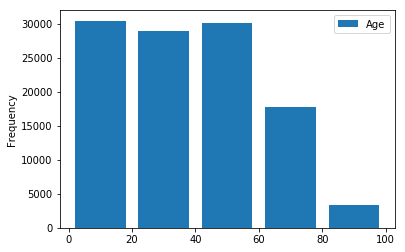

In [19]:
df[['Age']].plot(kind='hist',bins=[0,20,40,60,80,100],rwidth=0.8)

Most patients are Within the age range of 0 to 20 years and 40 to 60 years.

###### What Age Range Shows Up Most for Their Appointment?

Text(0,0.5,'Age')

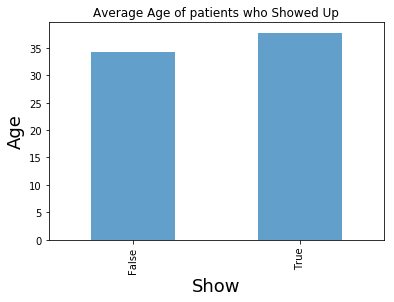

In [20]:
Show = ['False', 'True']
Show_means =df.groupby('Show')['Age'].mean()
Show_means.plot(kind='bar', title='Average Age of patients who Showed Up', alpha=.7);
plt.xlabel('Show', fontsize=18)
plt.ylabel('Age', fontsize=18)

From the Above, it can be deduced that patients of age 35 years and above are likely to Show up for Appointments than patients below 35 years of age.

###### What percentage of the patients actually benefited from the scholarship?

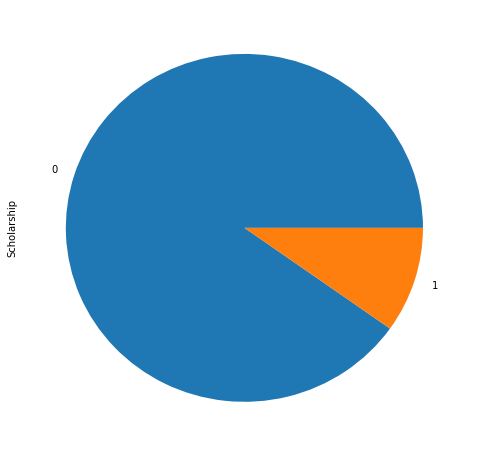

In [21]:
#visualize the percentage of patients that benefited in the scholarship

df['Scholarship'].value_counts().plot(kind='pie', figsize= (8,8));

A larger percentage of the patients are not enrolled in the schorlarship program.

Text(0.5,1,'Schorlarship enrolment effect on Show up')

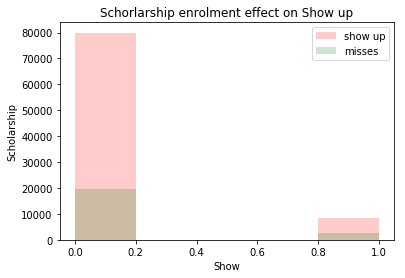

In [22]:
plt.hist(df.Scholarship[df.Show== True], 5, color='r', alpha=0.2, label='show up');
plt.hist(df.Scholarship[df.Show== False], 5, color='g', alpha=0.2, label='misses');
plt.legend()
plt.xlabel('Show')
plt.ylabel('Scholarship')
plt.title('Schorlarship enrolment effect on Show up')

From the plot, it can be deduced that enrollment in the scholarship as little or no effect in determining if the patients are likely to show up for appointment or not. 

We will like to investigate if the neighbourhod of registration determines if a patients shows up for appointment or not.
we try to check the number of patients from each neighbouhood

In [23]:
#visualize the number of patients from each unique neighbourhood
df['Neighbourhood'].value_counts()

JARDIM CAMBURI                 7717
MARIA ORTIZ                    5805
RESISTÊNCIA                    4431
JARDIM DA PENHA                3877
ITARARÉ                        3514
                               ... 
ILHA DO BOI                      35
ILHA DO FRADE                    10
AEROPORTO                         8
ILHAS OCEÂNICAS DE TRINDADE       2
PARQUE INDUSTRIAL                 1
Name: Neighbourhood, Length: 81, dtype: int64

#### What are the top 10 neighborhood the patients registered

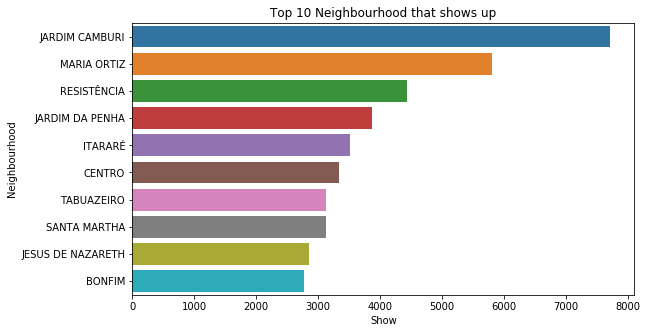

In [24]:
#visualize the top 10 neighborhood patients registered
Neighbourhood_order = df['Neighbourhood'].value_counts().head(10).index
plt.figure(figsize=(9, 5))
sns.countplot(data=df, y='Neighbourhood', order=Neighbourhood_order)
plt.title('Top 10 Neighbourhood that shows up')
plt.xlabel('Show')
plt.ylabel('Neighbourhood');

The bar shows the top 10 neighbourhood patients registered with 'JARDIM CAMBURI' having the highest number of patients.


We then visualize the rate at which patient showed up for appointment in the highest registered neighbourhood (JAMDIM CAMBURI) and compared it to one of the least registered neighbourhood (ILHA DO FRADE)

Text(0,0.5,'Neighbourhood')

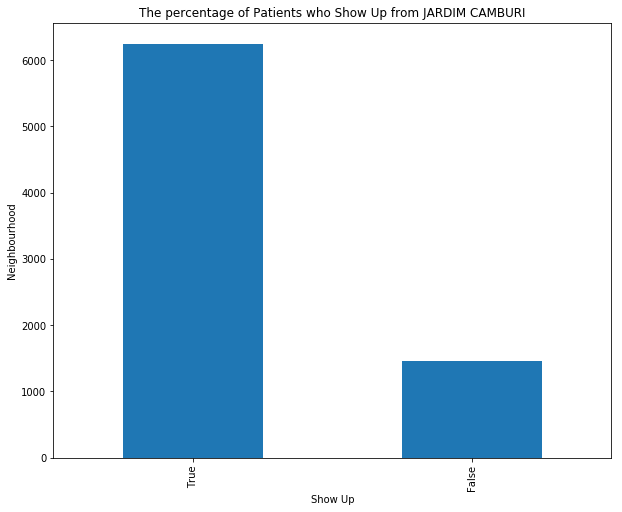

In [25]:
#visualize the rate at which patient showed up for appointment in the highest registered neighbourhood (JAMDIM CAMBURI)

neighbourhoodvisual = df[df['Neighbourhood']=='JARDIM CAMBURI']['Show'].value_counts()
neighbourhoodvisual.plot(kind='bar',figsize=(10,8))
plt.title('The percentage of Patients who Show Up from JARDIM CAMBURI')
plt.xlabel('Show Up')
plt.ylabel('Neighbourhood')

Text(0.5,1,'The percentage of Patients who Show Up from ILHA DO FRADE')

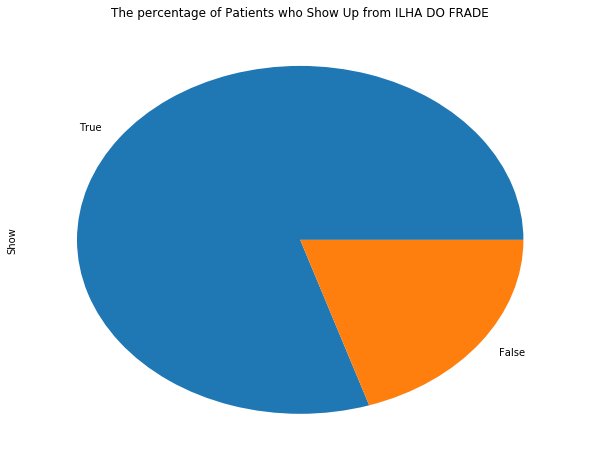

In [26]:
neighbourhoodvisual = df[df['Neighbourhood']=='ILHA DO FRADE']['Show'].value_counts()
neighbourhoodvisual.plot(kind='pie',figsize=(10,8))
plt.title('The percentage of Patients who Show Up from ILHA DO FRADE')

We examined the rate of show up in two of the neighboruhood; one with highest number of registered patients (JAMDIM CAMBURI) and the other has one of the least number of registration (ILHA DO FRADE).
From the two plots, it can be deduced that the neighbourhood has little to no effect on determining if a patient is likely to show up for appointment or not.

#### How long do patients wait for appointment from their scheduled date?

In [27]:
df['Days_interval'].value_counts()

 0      38563
 2       6725
 4       5290
 1       5213
 7       4906
        ...  
 117        1
 146        1
 82         1
-6          1
 127        1
Name: Days_interval, Length: 131, dtype: int64

The most frequent day interval between appointment day and scheduled day is 0, which means that most patients has their appointment fixed same day it was scheduled.

#### What day interval shows up the most for appointment?

Text(0,0.5,'Days Interval')

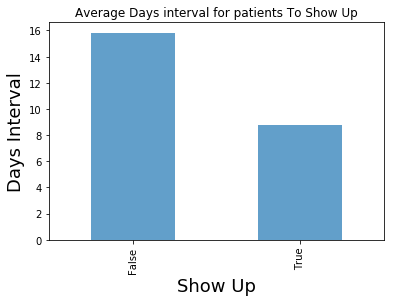

In [28]:
# visualize the percentage of patients that shows up on their appointment considering the days interval between scheduled day and appointment day

Show = ['False', 'True']
Show_means =df.groupby('Show')['Days_interval'].mean()
Show_means.plot(kind='bar', title='Average Days interval for patients To Show Up', alpha=.7);
plt.xlabel('Show Up', fontsize=18)
plt.ylabel('Days Interval', fontsize=18)

The plot shows that patients who schedule and appointment day interval does not exceed 8 days shows up more than those whose appointments days are fixed at later days.

#### what are the most prevalent ailment treated by the patient?

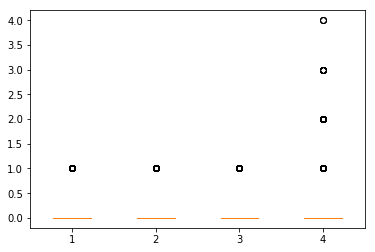

Text(3.2,0.5,'ylabel')

In [29]:
Hipertension = df["Hipertension"]
Diabetes = df["Diabetes"]
Alcoholism = df["Alcoholism"]
Handcap = df["Handcap"]
columns = [Hipertension, Diabetes, Alcoholism, Handcap]

fig, ax = plt.subplots()
ax.boxplot(columns)
plt.show()

ax.set_title('ailments')
ax.set_xlabel('xlabel')
ax.set_ylabel('ylabel')

Most prominent ailment treated by patient is Handcap.

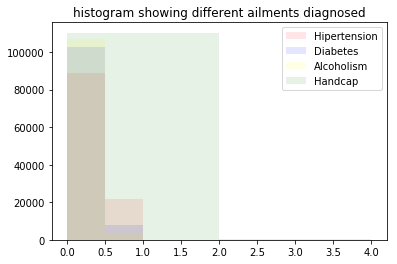

In [30]:
plt.hist(df['Hipertension'],bins = 2, alpha = 0.1, 
         color = 'red')
plt.hist(df['Diabetes'],bins = 2, alpha = 0.1,
         color = 'blue')
plt.hist(df['Alcoholism'],bins = 2, alpha = 0.1,
         color = 'yellow')
plt.hist(df['Handcap'],bins = 2, alpha = 0.1,
         color = 'green')
  
plt.title("histogram showing different ailments diagnosed")
plt.legend(['Hipertension', 'Diabetes', 'Alcoholism', 'Handcap'])

Handcap is the most common ailment

# CONCLUSION

###### Result 

From the data anlysed, we can deduce that:

1. patients within the age range 35 and above are more likely to show up for appointment than patients younger than 30
2. patients whose interval between "scheduled date" and "appointment day" is within 0 to 8 days are likely to show up for appointment than patients with more than 8 days interval.
3. Neighborhood the patients registered has little or no effect in determining if a patient will show up
4. Only few pwercentage of the patient are enrolled in scholarship. Also scholarship enrollment has no effect in patient showing up for appointment

###### Limitation

1. Most of the data are categorical which limit our ability to carry out some analysis
2. no statistical analysis is carried out

In [31]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0